In [85]:
%run hc/import.py
%matplotlib inline 

           沪深300     贵州茅台  工商银行   中国平安  中煤能源
trade_date                                  
2019-12-31   NaN  1183.00  5.88  85.46  5.02
2019-12-30   NaN  1185.80  5.89  85.89  5.02
2019-12-27   NaN  1163.00  5.90  84.72  4.90
2019-12-26   NaN  1135.10  5.86  84.43  4.86
2019-12-25   NaN  1133.70  5.83  83.93  4.81
...          ...      ...   ...    ...   ...
2009-01-09   NaN   107.29  3.58  28.41  7.32
2009-01-08   NaN   108.53  3.54  28.34  7.09
2009-01-07   NaN   106.79  3.62  29.87  7.25
2009-01-06   NaN   108.71  3.70  29.86  7.30
2009-01-05   NaN   108.38  3.60  28.85  6.87

[2668 rows x 5 columns]


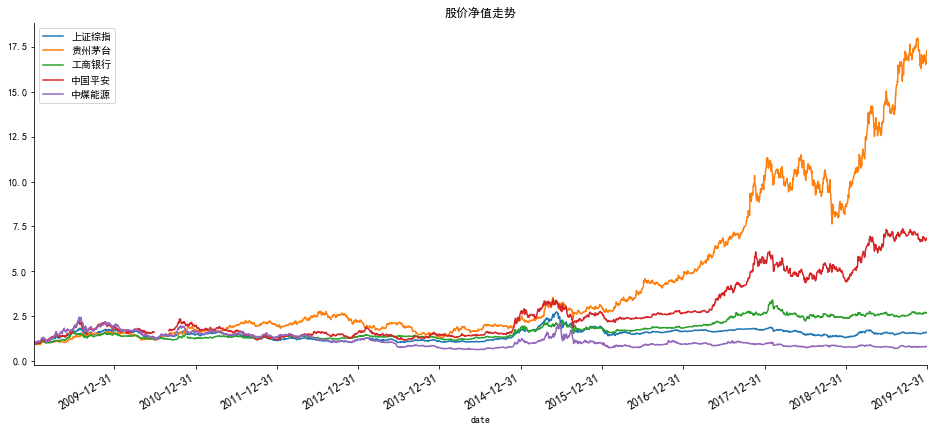

In [82]:
### 获取数据：tushare开源库（确认已安装好：pip install tushare）
import tushare as ts
#起始和结束日期可以自行输入，否则使用默认
def get_data(code,start_date='20090101', end_date='20191231'):
    df = ts.pro_bar(ts_code=code, start_date=start_date, end_date=end_date)
    df.index=pd.to_datetime(df.trade_date)    
    return df.close
#返回收盘价
#以上证综指、贵州茅台、工商银行、中国平安为例
stocks={'399300.SZ':'沪深300','600519.SH':'贵州茅台','601398.SH':'工商银行','601318.SH':'中国平安','601898.SH':'中煤能源'}
#获取上述股票（指数）的每日前复权收盘价
df=pd.DataFrame()
for code,name in stocks.items():
    df[name]=get_data(code)
    
print(df)
#以第一交易日2016年1月5日收盘价为基点，计算净值
df_new=df/df.iloc[0]
#将上述股票在回测期间内的净值可视化
df_new.plot(figsize=(16,7))
#图标题
plt.title('股价净值走势',fontsize=12)#,fontproperties = myfont)
#设置x轴坐标
my_ticks = pd.date_range('2009-01-01','2019-12-31',freq='Y')
plt.xticks(my_ticks,fontsize=12)
#去掉上、右图的线
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#plt.legend(prop = myfont)
plt.show()


In [89]:
# 取值时间节点
start_dt='20190101'
time_temp =datetime.datetime.now() - datetime.timedelta(days=0)
end_dt = time_temp.strftime('%Y%m%d')
stock_pool ='601898.SH'
df = ts.pro_bar(ts_code=stock_pool, adj='qfq', start_date=start_dt, end_date=end_dt,ma=[3,5,8,13,21,34,55,89,144])
df=df.sort_values(by=['trade_date'], ascending=1) 
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma3,ma_v_3,ma5,ma_v_5,ma8,ma_v_8,ma13,ma_v_13,ma21,ma_v_21,ma34,ma_v_34,ma55,ma_v_55,ma89,ma_v_89,ma144,ma_v_144
243,601898.SH,20190102,4.5806,4.6101,4.5216,4.5511,4.5708,-0.0197,-0.4310,66672.09,30923.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,601898.SH,20190103,4.5315,4.6199,4.5216,4.5904,4.5511,0.0393,0.8635,72981.59,34070.535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,601898.SH,20190104,4.5708,4.6691,4.5610,4.6593,4.5904,0.0689,1.5010,64103.32,30215.815,4.6003,67919.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,601898.SH,20190107,4.6691,4.7281,4.6593,4.7084,4.6593,0.0491,1.0538,88771.21,42447.175,4.6527,75285.3733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,601898.SH,20190108,4.7084,4.7281,4.6789,4.6986,4.7084,-0.0098,-0.2081,72397.18,34670.320,4.6888,75090.5700,4.6416,72985.078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,601898.SH,20191225,4.8600,4.8700,4.7900,4.8100,4.8900,-0.0800,-1.6360,87461.34,42238.703,4.8367,94881.1233,4.8600,102196.928,4.8625,125137.3763,4.8385,116551.5085,4.8229,114830.0624,4.8050,121709.6109,4.8211,120468.8960,4.8218,138119.2152,4.7472,120621.2874
3,601898.SH,20191226,4.8200,4.8600,4.8000,4.8600,4.8100,0.0500,1.0395,88867.94,42865.502,4.8533,88830.5800,4.8500,97392.528,4.8663,117501.5063,4.8415,113294.2862,4.8214,112464.2748,4.8059,121696.2188,4.8200,119688.6471,4.8285,138402.9676,4.7483,120686.0695
2,601898.SH,20191227,4.8400,4.9800,4.8300,4.9000,4.8600,0.0400,0.8230,243784.99,119940.236,4.8567,140038.0900,4.8540,123459.260,4.8675,120823.6975,4.8500,126147.2277,4.8271,118904.0362,4.8097,125942.3618,4.8178,121237.4278,4.8355,140382.7636,4.7496,121696.4470
1,601898.SH,20191230,4.8900,5.0300,4.8700,5.0200,4.9000,0.1200,2.4490,253118.84,126077.133,4.9267,195257.2567,4.8960,152679.114,4.8850,137094.5512,4.8685,139421.2854,4.8338,125249.1505,4.8115,126805.7574,4.8182,123683.0838,4.8430,142051.6901,4.7519,122915.3135


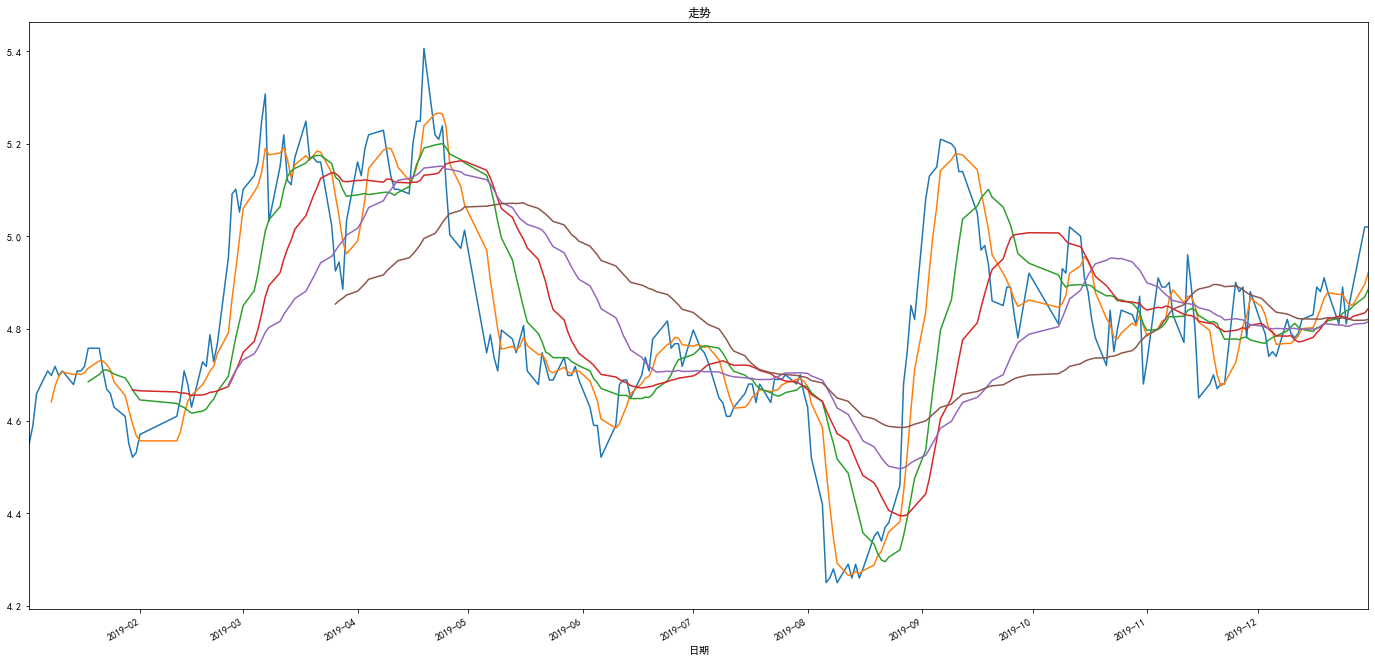

In [92]:
#将数据列表中的第3列'trade_date'设置为索引
df.index=pd.to_datetime(df.trade_date) 
#画出收盘价的走势
df['close'].plot(figsize=(24,12))
df['ma5'].plot(figsize=(24,12))
df['ma13'].plot(figsize=(24,12))
df['ma21'].plot(figsize=(24,12))
df['ma34'].plot(figsize=(24,12))
df['ma55'].plot(figsize=(24,12))
#df['ma89'].plot(figsize=(24,12))
#df['ma144'].plot(figsize=(24,12))
plt.title('走势')
plt.xlabel('日期')
plt.show()

In [88]:
#将数据列表中的第3列'trade_date'设置为索引
df.index=pd.to_datetime(df.trade_date) 
df=df[['close']]  
df

,close
trade_date,
2009-01-05,5.8752
2009-01-06,6.2429
2009-01-07,6.2002
2009-01-08,6.0633
2009-01-09,6.2600
...,...
2019-12-25,4.8100
2019-12-26,4.8600
2019-12-27,4.9000


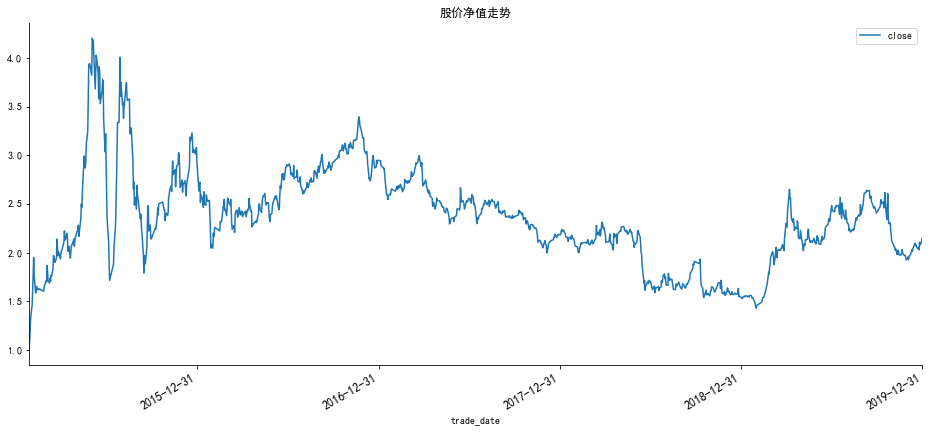

In [62]:
#以第一交易日2009年1月5日收盘价为基点，计算净值
df_new=df/df.iloc[0]
#将上述股票在回测期间内的净值可视化
df_new.plot(figsize=(16,7))
#图标题
plt.title('股价净值走势',fontsize=12)#,fontproperties = myfont)
#设置x轴坐标
my_ticks = pd.date_range('2015-01-01','2019-12-31',freq='Y')
plt.xticks(my_ticks,fontsize=12)
#去掉上、右图的线
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#plt.legend(prop = myfont)
plt.show()

In [55]:
### 区间累计收益率(绝对收益率)
total_ret=df_new.iloc[-1]-1
TR=pd.DataFrame(total_ret.values,columns=['累计收益率'],index=total_ret.index)
TR

,累计收益率
close,1.148401


In [65]:
#numpy:np.maximum.accumulate计算序列累计最大值
code='close'
n_d=((np.maximum.accumulate(df[code])-df[code])/np.maximum.accumulate(df[code])).max()
#pandas使用cummax（）计算序列累计最大值
p_d=((df[code].cummax()-df[code])/df[code].cummax()).max()
#打印结果
print(f'numpy方法计算结果：{round(n_d*100,2)}%')
print(f'pandas方法计算结果：{round(p_d*100,2)}%') 

numpy方法计算结果：66.01%
pandas方法计算结果：66.01%


In [66]:
###年化收益率,假设一年以250交易日计算
annual_ret=pow(1+total_ret,250/len(df_new))-1
AR=pd.DataFrame(annual_ret.values,columns=['年化收益率'],index=annual_ret.index)
AR

,年化收益率
close,0.173807


In [67]:
#定义成函数，减少重复工作
def max_drawdown(df):
    md=((df.cummax()-df)/df.cummax()).max()
    return round(md,4)
md={}
for code,name in stocks.items():
    md[name]=max_drawdown(df[name])
#最大回撤率结果：
MD=pd.DataFrame(md,index=['最大回撤']).T
MD

KeyError: '上证综指'

,date,code,name,weight
0,2019-12-31,600000,浦发银行,1.05
1,2019-12-31,600004,白云机场,0.13
2,2019-12-31,600009,上海机场,0.55
3,2019-12-31,600010,包钢股份,0.22
4,2019-12-31,600011,华能国际,0.18
...,...,...,...,...
295,2019-12-31,300347,泰格医药,0.24
296,2019-12-31,300408,三环集团,0.17
297,2019-12-31,300413,芒果超媒,0.14
298,2019-12-31,300433,蓝思科技,0.08


In [83]:
pro.index_daily(ts_code='399300.SZ')

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,399300.SZ,20191231,4096.5821,4077.7519,4098.1444,4069.0086,4081.6334,14.9487,0.3662,1.232643e+08,1.731193e+08
1,399300.SZ,20191230,4081.6334,4015.5195,4083.6901,4001.4951,4022.0278,59.6056,1.4820,1.559715e+08,2.168147e+08
2,399300.SZ,20191227,4022.0278,4029.2454,4066.7964,4019.7223,4025.9879,-3.9601,-0.0984,1.509264e+08,1.950904e+08
3,399300.SZ,20191226,4025.9879,3993.6686,4025.9879,3993.5413,3990.8671,35.1208,0.8800,1.088606e+08,1.408150e+08
4,399300.SZ,20191225,3990.8671,3988.6574,4000.5556,3976.3559,3992.9581,-2.0910,-0.0524,9.493889e+07,1.318965e+08
...,...,...,...,...,...,...,...,...,...,...,...
3641,399300.SZ,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
3642,399300.SZ,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
3643,399300.SZ,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
3644,399300.SZ,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06
